# Advanced Level: Statistical Analysis of DEI in Music Industry

Welcome to the advanced workshop on DEI in the music industry! This notebook is an extension of the intermediate workshop with more advanced analysis and visualization techniques.

## Learning Objectives:
- Understand the importance of DEI and how it affects the music industry
- Create advanced visualizations with multiple variables
- Analyze correlation patterns in the data
- Apply grouping and aggregation techniques
- Combine multiple datasets

## 🚀 Getting Started
Let's start by importing the libraries we'll need and loading our data.

In [1]:
# Enable inline plots
%matplotlib inline
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set up plotting style
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## 📂 Load the Dataset

We have 5 datasets to work with:
* 4 datasets which contains listening stats for a different (anonymized) genre (a.k.a the "listeners datasets")
* 1 datasets which contains engagement stats for all genres (a.k.a the "comments dataset")

In addition, we have a legend describing the columns.

In [2]:
# Explicitly list the 4 dataset files
# 💡 Store the file paths in a list called data_files.
# 📖 Docs: Working with file paths in Python: https://docs.python.org/3/library/os.path.html
data_files = [
    "../../data/1 Creators and their Listeners with gender and 6 locations.csv",
    "../../data/2 Creators and their Listeners with gender and 6 locations.csv",
    "../../data/3 Creators and their Listeners with gender and 6 locations.csv",
    "../../data/5 Creators and their Listeners with gender and 6 locations.csv"
]

# Load all datasets into a dictionary
# 💡 Reading the csv file for each data set above
# 📖 Docs: Reading CSV files with pandas: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
datasets = {}
for i, file in enumerate(data_files):
    name = f"Genre {i+1}"
    datasets[name] = pd.read_csv(file)


# Load comments dataset
comments_data = pd.read_csv("../../data/creator and listener comments by gender and anonymised genre.csv")

# Load legend
legend = pd.read_csv("../../data/legend.csv")

In [3]:
# Combine the listeners datasets per genre into one large dataset
listeners_data = pd.concat(datasets.values()).reset_index(drop=True)

## 🔍 Explore the Data
Get familiarized with the listeners & comments datasets before jumping to the next step!
- How does the data look like?
- What are the columns? What do they represent?
- What are the data types?
- What are the missing values?
- Are there any duplicates?

Is there anything you would like to transform in the data?  (e.g. change data types, remove certain columns, rows, replace values, deal with null values etc.)

In [4]:
# Explore how the Genre datasets look like
## 🧐 Understand what the data represents
## 🔍 Look up column descriptions in the legend
## 📖 Docs: Helpful pandas methods can be: DataFrame.shape(), DataFrame.head(), DataFrame.tail(), DataFrame.describe(), DataFrame.columns
## 📖 Docs: Check out this tutorial with a good overview of an initial data exploration & cleaning process: https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/data-cleaning.html
listeners_data.head()

,creator_assigned_number,creator_gender,most_uploaded_genre,creator_signup_country,total_play_count,total_play_count_male,total_play_count_female,total_play_count_custom_gender,total_play_count_null_gender,plays_by_males_BR,...,total_play_count_US,plays_by_males_VN,pct_plays_by_males_VN,plays_by_females_VN,pct_plays_by_females_VN,plays_by_custom_gender_VN,pct_plays_by_custom_gender_VN,plays_by_null_gender_VN,pct_plays_by_null_gender_VN,total_play_count_VN
0,2,male,1,GB,260,162,79,2,17,0,...,1,0,NaN,0,NaN,0,NaN,0,NaN,0
1,6,male,1,GB,160,100,15,1,44,0,...,33,0,NaN,0,NaN,0,NaN,0,NaN,0
2,10,male,1,GB,288,187,71,2,28,0,...,2,0,NaN,0,NaN,0,NaN,0,NaN,0
3,11,male,1,GB,208,142,53,3,10,0,...,5,0,NaN,0,NaN,0,NaN,0,NaN,0
4,12,male,1,GB,107,66,33,0,8,0,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0


In [5]:
listeners_data.columns.values.tolist()

['creator_assigned_number',
 'creator_gender',
 'most_uploaded_genre',
 'creator_signup_country',
 'total_play_count',
 'total_play_count_male',
 'total_play_count_female',
 'total_play_count_custom_gender',
 'total_play_count_null_gender',
 'plays_by_males_BR',
 'pct_plays_by_males_BR',
 'plays_by_females_BR',
 'pct_plays_by_females_BR',
 'plays_by_custom_gender_BR',
 'pct_plays_by_custom_gender_BR',
 'plays_by_null_gender_BR',
 'pct_plays_by_null_gender_BR',
 'total_play_count_BR',
 'plays_by_males_DE',
 'pct_plays_by_males_DE',
 'plays_by_females_DE',
 'pct_plays_by_females_DE',
 'plays_by_custom_gender_DE',
 'pct_plays_by_custom_gender_DE',
 'plays_by_null_gender_DE',
 'pct_plays_by_null_gender_DE',
 'total_play_count_DE',
 'plays_by_males_EG',
 'pct_plays_by_males_EG',
 'plays_by_females_EG',
 'pct_plays_by_females_EG',
 'plays_by_custom_gender_EG',
 'pct_plays_by_custom_gender_EG',
 'plays_by_null_gender_EG',
 'pct_plays_by_null_gender_EG',
 'total_play_count_EG',
 'plays_by_male

In [6]:
listeners_data.describe()

,creator_assigned_number,most_uploaded_genre,total_play_count,total_play_count_male,total_play_count_female,total_play_count_custom_gender,total_play_count_null_gender,plays_by_males_BR,pct_plays_by_males_BR,plays_by_females_BR,...,total_play_count_US,plays_by_males_VN,pct_plays_by_males_VN,plays_by_females_VN,pct_plays_by_females_VN,plays_by_custom_gender_VN,pct_plays_by_custom_gender_VN,plays_by_null_gender_VN,pct_plays_by_null_gender_VN,total_play_count_VN
count,65267.000000,65267.000000,6.526700e+04,6.526700e+04,65267.000000,65267.000000,65267.000000,65267.000000,5449.000000,65267.000000,...,6.526700e+04,65267.000000,3594.000000,65267.000000,3594.000000,65267.000000,3594.000000,65267.000000,3594.000000,65267.000000
mean,32634.000000,1.813382,9.257122e+02,6.582629e+02,158.600211,26.899474,81.949576,0.309146,68.127752,0.066557,...,7.316109e+02,0.247813,57.776689,0.176460,30.204210,0.018156,3.532073,0.037124,8.487028,0.479553
std,18841.104347,0.773898,9.863538e+03,7.408075e+03,1701.946136,257.279742,752.860127,4.567390,43.180727,1.045123,...,9.232826e+03,3.734960,44.481036,3.105571,41.003852,0.369680,16.354190,0.607023,25.096458,7.052860
min,1.000000,1.000000,1.000000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16317.500000,1.000000,1.480000e+02,9.900000e+01,16.000000,2.000000,11.000000,0.000000,0.000000,0.000000,...,9.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32634.000000,2.000000,2.440000e+02,1.670000e+02,39.000000,6.000000,22.000000,0.000000,100.000000,0.000000,...,1.670000e+02,0.000000,71.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48950.500000,2.000000,5.270000e+02,3.660000e+02,91.000000,16.000000,49.000000,0.000000,100.000000,0.000000,...,3.770000e+02,0.000000,100.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65267.000000,5.000000,1.890323e+06,1.440947e+06,293355.000000,42298.000000,125804.000000,390.000000,100.000000,97.000000,...,1.818600e+06,411.000000,100.000000,303.000000,100.000000,42.000000,100.000000,41.000000,100.000000,562.000000


In [7]:
# Check for duplicates
listeners_data.duplicated().sum()
# No duplicates, we are good to go! 🚀 

np.int64(0)

In [8]:
# Check for missing values
# Docs: You can find more information on how to work with missing data (e.g. drop it or fill it) here: https://pandas.pydata.org/docs/user_guide/missing_data.html

missing_data = listeners_data.isnull().sum()
missing_data[missing_data > 0]
# Okay, we have the creator_gender missing and percentage data that is missing, let's have a look why some of them are missing

creator_gender                    8364
pct_plays_by_males_BR            59818
pct_plays_by_females_BR          59818
pct_plays_by_custom_gender_BR    59818
pct_plays_by_null_gender_BR      59818
pct_plays_by_males_DE            15833
pct_plays_by_females_DE          15833
pct_plays_by_custom_gender_DE    15833
pct_plays_by_null_gender_DE      15833
pct_plays_by_males_EG            61418
pct_plays_by_females_EG          61418
pct_plays_by_custom_gender_EG    61418
pct_plays_by_null_gender_EG      61418
pct_plays_by_males_GB             7478
pct_plays_by_females_GB           7478
pct_plays_by_custom_gender_GB     7478
pct_plays_by_null_gender_GB       7478
pct_plays_by_males_US             1544
pct_plays_by_females_US           1544
pct_plays_by_custom_gender_US     1544
pct_plays_by_null_gender_US       1544
pct_plays_by_males_VN            61673
pct_plays_by_females_VN          61673
pct_plays_by_custom_gender_VN    61673
pct_plays_by_null_gender_VN      61673
dtype: int64

In [9]:
# Let's look at exemplary missing values to understand how you want to deal with the missing values. 
# What does the missing data represent?
# What do we want to do with it? we can drop the columns, fill the missing values or keep them as is. 
listeners_data[listeners_data["pct_plays_by_males_BR"].isnull()] 

,creator_assigned_number,creator_gender,most_uploaded_genre,creator_signup_country,total_play_count,total_play_count_male,total_play_count_female,total_play_count_custom_gender,total_play_count_null_gender,plays_by_males_BR,...,total_play_count_US,plays_by_males_VN,pct_plays_by_males_VN,plays_by_females_VN,pct_plays_by_females_VN,plays_by_custom_gender_VN,pct_plays_by_custom_gender_VN,plays_by_null_gender_VN,pct_plays_by_null_gender_VN,total_play_count_VN
0,2,male,1,GB,260,162,79,2,17,0,...,1,0,NaN,0,NaN,0,NaN,0,NaN,0
1,6,male,1,GB,160,100,15,1,44,0,...,33,0,NaN,0,NaN,0,NaN,0,NaN,0
2,10,male,1,GB,288,187,71,2,28,0,...,2,0,NaN,0,NaN,0,NaN,0,NaN,0
3,11,male,1,GB,208,142,53,3,10,0,...,5,0,NaN,0,NaN,0,NaN,0,NaN,0
4,12,male,1,GB,107,66,33,0,8,0,...,0,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65262,65042,male,5,US,326,193,63,18,52,0,...,259,0,NaN,0,NaN,0,NaN,0,NaN,0
65263,65048,male,5,US,229,119,95,3,12,0,...,80,0,NaN,0,NaN,0,NaN,0,NaN,0
65264,65134,female,5,US,126,39,38,41,8,0,...,85,0,NaN,0,NaN,0,NaN,0,NaN,0
65265,65153,custom,5,US,136,17,81,18,20,0,...,94,0,NaN,0,NaN,0,NaN,0,NaN,0


In [10]:
# Explore the categorial columns
# Hint: Series.value_counts() can be used to count values in one series

# Which genders are represented in the datasets for creator's and listeners? 
listeners_data["creator_gender"].value_counts(dropna=False)

creator_gender
male      47795
NaN        8364
female     5263
custom     3845
Name: count, dtype: int64

In [11]:
# Which countries are represented in the datasets for creator's and listeners? 
listeners_data["creator_signup_country"].value_counts(dropna=False)

creator_signup_country
US    45811
GB    11736
DE     5606
BR     1284
VN      547
EG      283
Name: count, dtype: int64

In [12]:
# Explore how the comments dataset look like
## 🧐Understand what the data represents
## 🔍 Look up column descriptions in the legend
comments_data.shape

(58, 26)

In [13]:
comments_data.describe()

,assigned_number_for_genre_type,new_comments_by_male_creator,pct_new_comments_by_male_creator,new_comments_by_female_creator,pct_new_comments_by_female_creator,new_comments_by_custom_gender_creator,pct_new_comments_by_custom_gender_creator,new_comments_by_null_gender_creator,pct_new_comments_by_null_gender_creator,total_new_creator_comment_count,...,pct_responses_by_female_creator,responses_by_custom_gender_creator,pct_responses_by_custom_gender_creator,responses_by_null_gender_creator,pct_responses_by_null_gender_creator,total_responses_by_creator,pct_total_responses_by_creator,total_responses_by_listener,pct_total_responses_by_listener,total_reponse_count
count,58.000000,58.000000,29.000000,58.000000,29.000000,58.000000,29.000000,58.000000,29.000000,58.000000,...,31.000000,58.000000,31.000000,58.000000,31.000000,58.000000,43.000000,58.000000,43.000000,58.000000
mean,29.500000,42.775862,64.087931,7.068966,10.629310,6.120690,17.115517,3.051724,8.167586,59.017241,...,8.964194,13.258621,6.135161,10.775862,7.501613,189.827586,33.157907,180.155172,66.066512,374.534483
std,16.886879,199.087043,33.669179,26.425574,14.134686,29.090951,30.419084,15.195131,20.712490,266.397309,...,13.369411,65.322294,9.373012,52.887183,18.336430,994.999253,27.336495,764.489528,27.622268,1756.437325
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.250000,0.000000,43.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.375000,0.250000
50%,29.500000,0.000000,72.610000,0.000000,4.410000,0.000000,2.700000,0.000000,0.000000,0.500000,...,3.570000,0.000000,0.000000,0.000000,0.000000,1.500000,34.330000,2.000000,61.760000,4.500000
75%,43.750000,4.750000,96.430000,1.000000,16.670000,1.000000,20.000000,0.000000,5.040000,5.750000,...,12.135000,0.750000,6.110000,0.750000,6.960000,14.500000,50.000000,21.000000,100.000000,39.250000
max,58.000000,1307.000000,100.000000,172.000000,54.100000,215.000000,100.000000,106.000000,100.000000,1800.000000,...,50.000000,481.000000,30.360000,383.000000,100.000000,7320.000000,100.000000,4795.000000,100.000000,12295.000000


In [14]:
comments_data.head()

,assigned_number_for_genre_type,new_comments_by_male_creator,pct_new_comments_by_male_creator,new_comments_by_female_creator,pct_new_comments_by_female_creator,new_comments_by_custom_gender_creator,pct_new_comments_by_custom_gender_creator,new_comments_by_null_gender_creator,pct_new_comments_by_null_gender_creator,total_new_creator_comment_count,...,pct_responses_by_female_creator,responses_by_custom_gender_creator,pct_responses_by_custom_gender_creator,responses_by_null_gender_creator,pct_responses_by_null_gender_creator,total_responses_by_creator,pct_total_responses_by_creator,total_responses_by_listener,pct_total_responses_by_listener,total_reponse_count
0,1,1307,72.61,172,9.56,215,11.94,106,5.89,1800,...,10.42,481,6.57,383,5.23,7320,59.54,4795,39.00,12295
1,2,800,82.22,91,9.35,33,3.39,49,5.04,973,...,3.45,107,5.05,132,6.23,2119,38.58,3361,61.20,5492
2,3,88,45.36,56,28.87,46,23.71,4,2.06,194,...,30.34,97,18.16,24,4.49,534,38.28,827,59.28,1395
3,5,52,62.65,17,20.48,12,14.46,2,2.41,83,...,9.82,19,5.65,29,8.63,336,57.05,235,39.90,589
4,7,36,52.94,3,4.41,28,41.18,1,1.47,68,...,13.87,13,9.49,15,10.95,137,41.39,185,55.89,331


In [15]:
comments_data.columns.tolist()

# New Comments and Total comments (by gender of creator)
# Responses (by creators genderand responses by listeners)

['assigned_number_for_genre_type',
 'new_comments_by_male_creator',
 'pct_new_comments_by_male_creator',
 'new_comments_by_female_creator',
 'pct_new_comments_by_female_creator',
 'new_comments_by_custom_gender_creator',
 'pct_new_comments_by_custom_gender_creator',
 'new_comments_by_null_gender_creator',
 'pct_new_comments_by_null_gender_creator',
 'total_new_creator_comment_count',
 'pct_new_comments_by_creator',
 'listener_new_comment_count',
 'pct_new_comments_by_listener',
 'responses_by_male_creator',
 'pct_responses_by_male_creator',
 'responses_by_female_creator',
 'pct_responses_by_female_creator',
 'responses_by_custom_gender_creator',
 'pct_responses_by_custom_gender_creator',
 'responses_by_null_gender_creator',
 'pct_responses_by_null_gender_creator',
 'total_responses_by_creator',
 'pct_total_responses_by_creator',
 'total_responses_by_listener',
 'pct_total_responses_by_listener',
 'total_reponse_count']

In [16]:
# 📊 Do any data transformations you consider necessary before jumping to the next step
listeners_data["creator_gender"] = listeners_data["creator_gender"].fillna("unknown")

<details>
<summary>Click here to get a brief overview of the different datasets</summary>

**Listeners dataset:**
- one row per creator
- contains listening data from 4 different genres
- creator gender (`creator_gender`)
- genders represented: female, male, custom, unknown (NA)
- countries represented: US, GB, DE, EG, BR, VN
- `total_play_count` as an indicator of the popularity of the creator
- `total_play_count_<gender>` as an indicator of the popularity of the creator among listener's gender
- `total_play_count_<country>` as an indicator of the popularity of the creator in different countries
- `plays_by_<gender>_<country>` and `pct_plays_by_<gender>_<countr>` as an indicator of the popularity of the creator among listener's genders and countries


**Comments dataset:**
- one row per genre
- `new_comments_by_<gender>_creator` and `pct_new_comments_by_<gender>_creator` as an indicator for the commenting behavior of creators based on creator's gender
- `total_new_creator_comment_count` displaying the total amount of new comments by creators in a genre
- `listener_new_comment_count` as an indicator of the listeners commenting behavior
- `responses_by_<gender>_creator` as an indicator for the responding behavior of creators of different based on creator's gender
- `total_reponse_count` as an indicator of the response behavior in different genres
- `total_responses_by_listener` as an indicator of the response behavior by listeners in different genres
- `total_responses_by_creator` as an indicator of the response behavior by creators in different genres
- `responses_by_<gender>_creator` as an indicator of the response behavior by creator's gender

</details>



Before moving on to the next step, we’d like to emphasize that this workshop is all about fostering creativity and having fun! Feel free to create additional visualizations whenever you feel they enhance your storytelling. Some of our favorite visualization types include:

- Bar plots
- Pie charts
- Heatmaps
- Scatter plots
- Box plots
- Sankey diagrams

That said, you’re not limited to these options. Experiment and explore other visualization methods that align with your data and the story you want to convey!

Check out the seaborn gallery if you need inspiration: https://seaborn.pydata.org/examples/index.html

## 🎧 Step 1: Creator-Listener Gender Dynamics
*Let's investigate whether creator gender identity influences listener demographics and consumption patterns, establishing baseline understanding of potential gender-based preferences, biases, or barriers in music discovery and consumption across genres and global markets.*

### a) 📊 Overall Creator-Listener Gender Influence
Let's examine the question of whether creator gender creates systematic patterns in listener demographics, identifying potential gender-based consumption biases that could impact creator visibility and success.

- Do listeners show preferential consumption patterns based on creator gender?
- How strong is the overall creator-listener gender correlation and what does this mean for equity?

<Axes: xlabel='total_play_count', ylabel='creator_gender'>

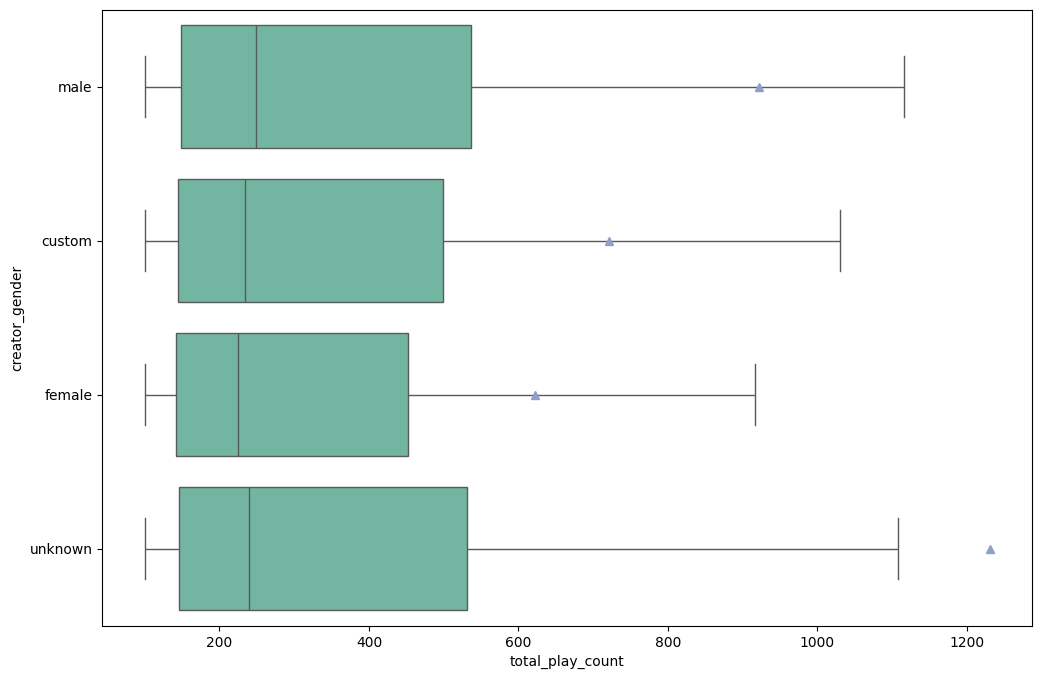

In [17]:
# First check out overall difference in total plays per gender across all genres
sns.boxplot(data=listeners_data, x="total_play_count", y="creator_gender", showfliers=False, showmeans=True)

In [19]:
# Calculate total listener gender proportions by creator gender
listener_gender_data = listeners_data[["creator_gender", "most_uploaded_genre", "total_play_count", "total_play_count_male", "total_play_count_female", "total_play_count_custom_gender", "total_play_count_null_gender"]]
listener_gender_data["pct_play_male"] = listener_gender_data["total_play_count_male"] / listener_gender_data["total_play_count"]
listener_gender_data["pct_play_female"] = listener_gender_data["total_play_count_female"] / listener_gender_data["total_play_count"]
listener_gender_data["pct_play_custom_gender"] = listener_gender_data["total_play_count_custom_gender"] / listener_gender_data["total_play_count"]
listener_gender_data["pct_play_unknown_gender"] = listener_gender_data["total_play_count_null_gender"] / listener_gender_data["total_play_count"]

# Calculate the overall correlation between creator and listeners' gender
listener_gender_data.head()

/var/folders/gp/tzx_zzbx73vbhjr__gf2gm8c0000gn/T/ipykernel_47666/3620693664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listener_gender_data["pct_play_male"] = listener_gender_data["total_play_count_male"] / listener_gender_data["total_play_count"]
/var/folders/gp/tzx_zzbx73vbhjr__gf2gm8c0000gn/T/ipykernel_47666/3620693664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listener_gender_data["pct_play_female"] = listener_gender_data["total_play_count_female"] / listener_gender_data["total_play_co

,creator_gender,most_uploaded_genre,total_play_count,total_play_count_male,total_play_count_female,total_play_count_custom_gender,total_play_count_null_gender,pct_play_male,pct_play_female,pct_play_custom_gender,pct_play_unknown_gender
0,male,1,260,162,79,2,17,0.623077,0.303846,0.007692,0.065385
1,male,1,160,100,15,1,44,0.625000,0.093750,0.006250,0.275000
2,male,1,288,187,71,2,28,0.649306,0.246528,0.006944,0.097222
3,male,1,208,142,53,3,10,0.682692,0.254808,0.014423,0.048077
4,male,1,107,66,33,0,8,0.616822,0.308411,0.000000,0.074766


In [20]:
listener_gender_data.groupby("creator_gender").mean()

,most_uploaded_genre,total_play_count,total_play_count_male,total_play_count_female,total_play_count_custom_gender,total_play_count_null_gender,pct_play_male,pct_play_female,pct_play_custom_gender,pct_play_unknown_gender
creator_gender,,,,,,,,,,
custom,1.706372,721.289467,494.106892,127.398700,33.095189,66.688687,0.639184,0.194046,0.065681,0.101088
female,2.134904,622.463424,329.343910,210.916587,29.224017,52.978909,0.511625,0.337243,0.058891,0.092240
male,1.753719,922.126457,674.947379,142.262622,24.858144,80.058312,0.715990,0.160866,0.031123,0.092021
unknown,2.001196,1230.994500,845.355811,233.383070,34.253467,118.002152,0.652643,0.205341,0.036465,0.105551


In [23]:
plays_per_gender = listener_gender_data[["most_uploaded_genre", "pct_play_male", "pct_play_female", "pct_play_custom_gender", "pct_play_unknown_gender"]].melt(id_vars=["most_uploaded_genre"], var_name="gender", value_name="pct_plays")

mapping = {
    "pct_play_male": "male",
    "pct_play_female": "female",
    "pct_play_custom_gender": "custom",
    "pct_play_unknown_gender": "unknown"
}
plays_per_gender["gender"] = plays_per_gender["gender"].transform(lambda x: mapping[x])

In [35]:
# Visualize the results (use the plots you find most appropriate)
# 💡: DataFrame.melt() can help to change the format of the dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html#pandas-dataframe-melt

# Prepare listeners gender data for visualizations
listener_gender_data_melted = listener_gender_data.melt(id_vars=["most_uploaded_genre"], value_vars=["pct_play_female", "pct_play_male", "pct_play_unknown_gender", "pct_play_custom_gender"],
                    var_name="gender", value_name="percentage")

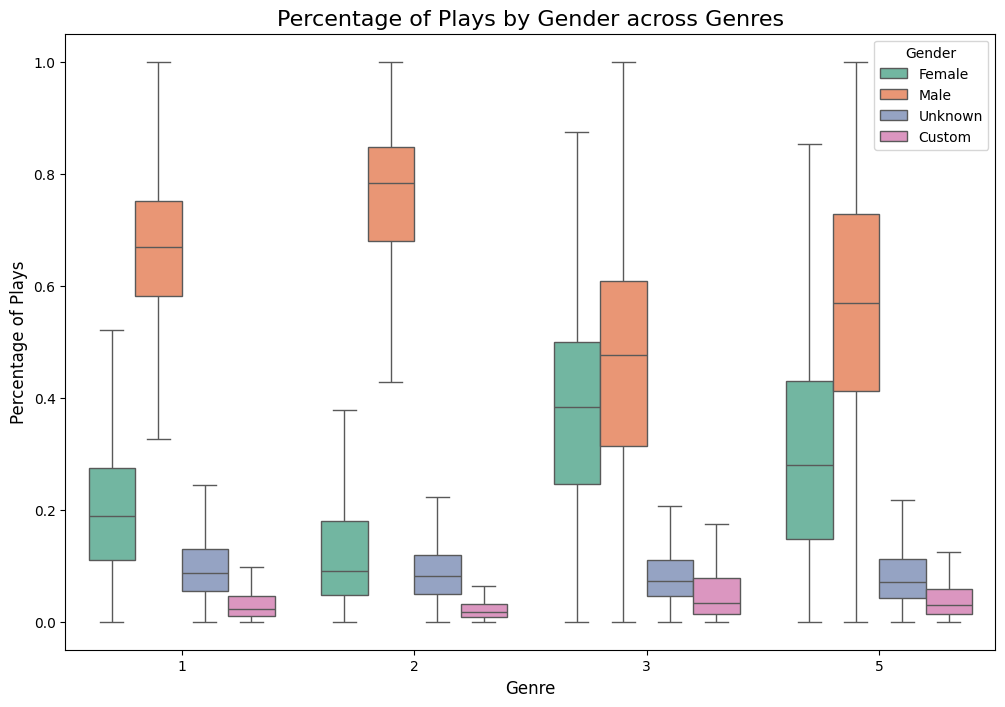

In [34]:
# Visualize how plays distribute in each genre
listener_gender_data_melted["gender"] = listener_gender_data_melted["gender"].replace({"pct_play_female": "Female", "pct_play_male": "Male", "pct_play_custom_gender": "Custom", "pct_play_unknown_gender": "Unknown"})
sns.boxplot(data=listener_gender_data_melted, x="most_uploaded_genre", y="percentage", hue="gender", showfliers=False)

plt.title("Percentage of Plays by Gender across Genres", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Percentage of Plays", fontsize=12)
plt.legend(title="Gender", loc="upper right")

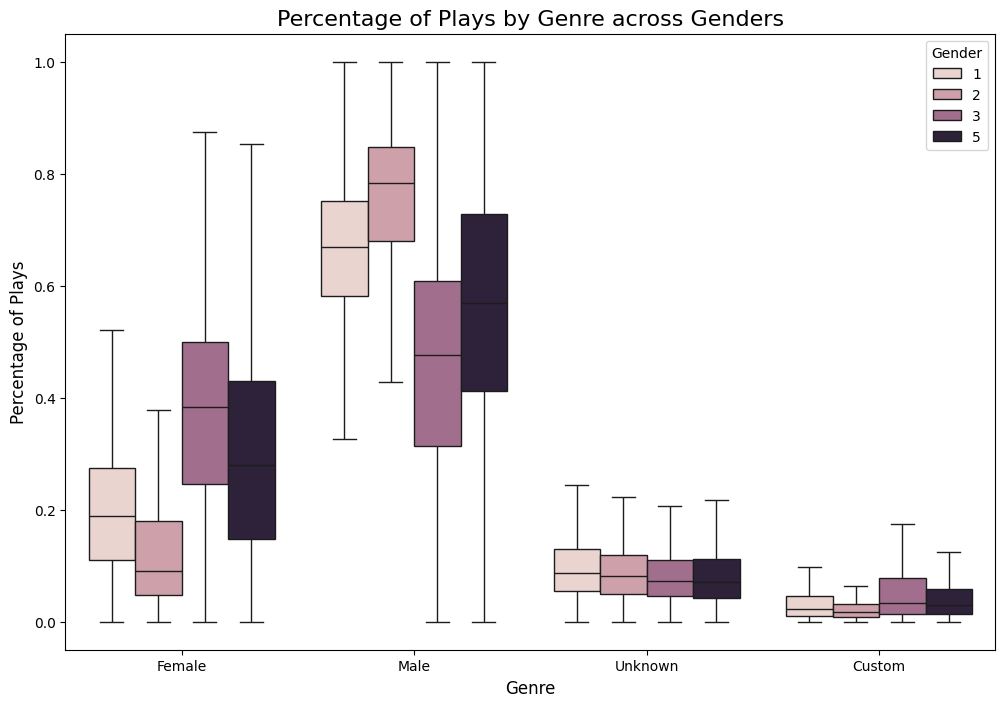

In [37]:
# Visualize which genres different genders prefer
listener_gender_data_melted["gender"] = listener_gender_data_melted["gender"].replace({"pct_play_female": "Female", "pct_play_male": "Male", "pct_play_custom_gender": "Custom", "pct_play_unknown_gender": "Unknown"})
sns.boxplot(data=listener_gender_data_melted, x="gender", y="percentage", hue="most_uploaded_genre", showfliers=False)

plt.title("Percentage of Plays by Genre across Genders", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Percentage of Plays", fontsize=12)
plt.legend(title="Gender", loc="upper right")

### b) 📚 Creator-Listener Gender Influence by Genre
We'll analyze how musical genres may amplify or mitigate gender-based listening patterns, identifying genres that promote cross-gender consumption versus those that may reinforce gender disparities.

- Which genres demonstrate the highest cross-gender listening patterns?
- Which genre show less visibility of different genders across creators and listeners?

Idea: Look at the ratio of female creators to female listeners for each genre - a simple proxy for representation. 

<Axes: xlabel='most_uploaded_genre', ylabel='count'>

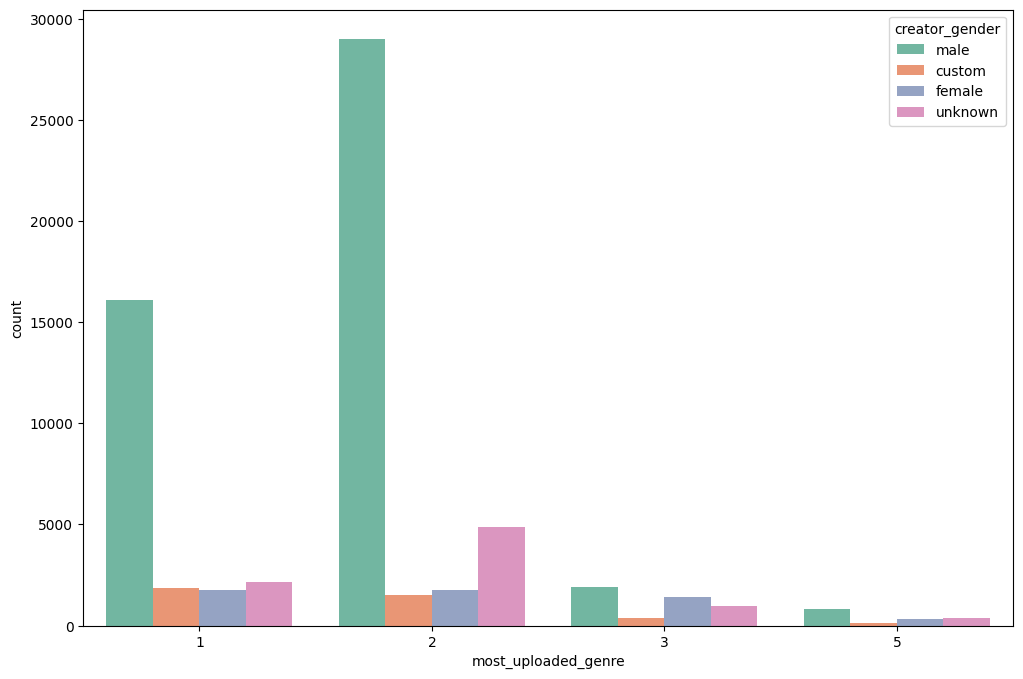

In [42]:
sns.countplot(data=listeners_data, x="most_uploaded_genre", hue="creator_gender")

In [43]:
# Calculate the percentage of represented genders in creators by genre
percentage_df = (
    listeners_data.groupby(["most_uploaded_genre", "creator_gender"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .droplevel(level=0)
    .reset_index(name="Percentage")
)

<Axes: xlabel='most_uploaded_genre', ylabel='Percentage'>

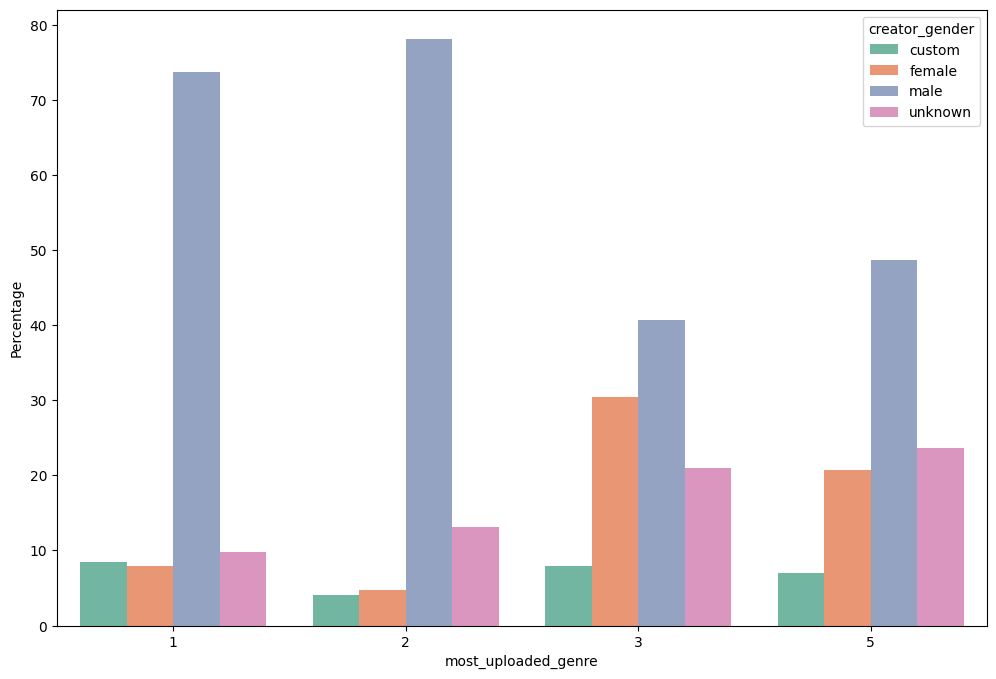

In [44]:
# Visualize the results (use the plots you find most appropriate)
sns.barplot(data=percentage_df, x="most_uploaded_genre", y="Percentage", hue="creator_gender")

In [45]:
listeners_data.count()

creator_assigned_number          65267
creator_gender                   65267
most_uploaded_genre              65267
creator_signup_country           65267
total_play_count                 65267
                                 ...  
plays_by_custom_gender_VN        65267
pct_plays_by_custom_gender_VN     3594
plays_by_null_gender_VN          65267
pct_plays_by_null_gender_VN       3594
total_play_count_VN              65267
Length: 63, dtype: int64

In [46]:
# For the representation ratios, we first check out the percentage of female creators and listeners
GENDER_VALUES = ["male", "female", "custom", "null"]
representation_ratios = listeners_data.groupby(["most_uploaded_genre", "creator_gender"]).agg(
    num_creators=("creator_gender", "size"),
    total_play_count_female=("total_play_count_female", "sum"),
    total_play_count_male=("total_play_count_male", "sum"),
    total_play_count_custom=("total_play_count_custom_gender", "sum"),
    total_play_count_null=("total_play_count_null_gender", "sum"),
    total_play_count=("total_play_count", "sum"),
).reset_index()

representation_ratios['creator_ratio'] = (
    representation_ratios['num_creators'] / representation_ratios.groupby('most_uploaded_genre')['num_creators'].transform('sum') * 100
)

for gender in GENDER_VALUES:
    representation_ratios[f'play_ratio_{gender}'] = (
        representation_ratios[f'total_play_count_{gender}'] / representation_ratios['total_play_count'] * 100
    )


<Figure size 1200x600 with 0 Axes>

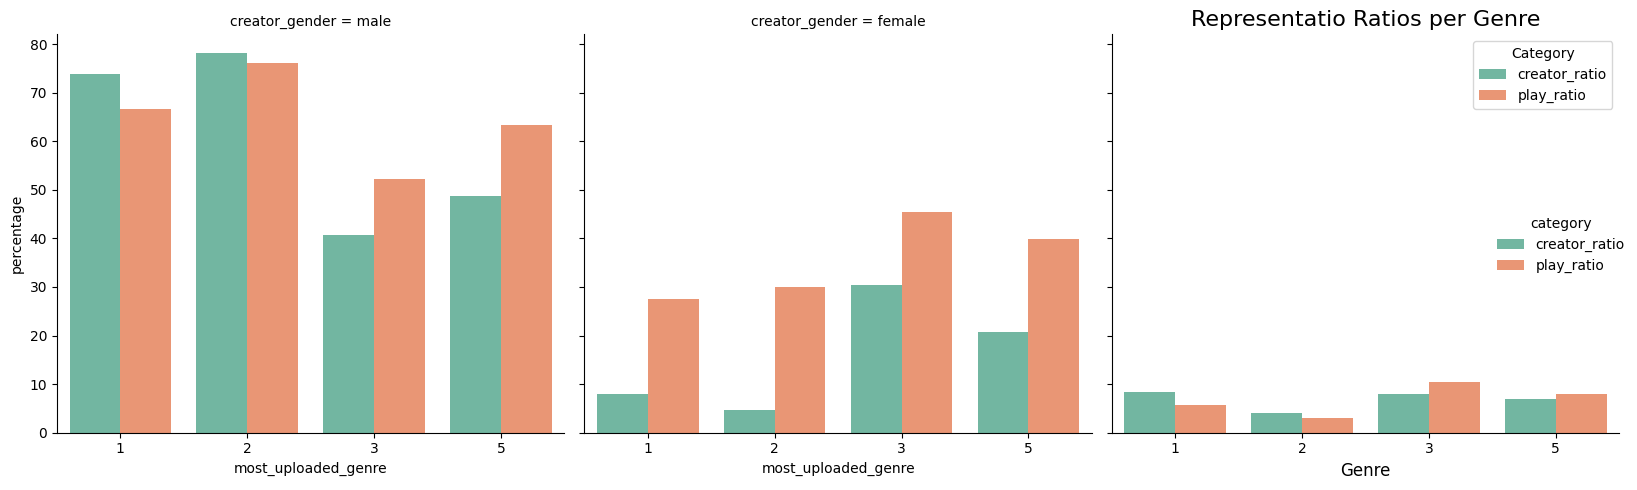

In [47]:
# Reshape the data for visualization
data = []
for gender in GENDER_VALUES:
    df_melted = representation_ratios[representation_ratios["creator_gender"] == gender].rename(columns={f"play_ratio_{gender}": "play_ratio"}).melt(
        id_vars=["most_uploaded_genre", "creator_gender"],
        value_vars=["creator_ratio", "play_ratio"],
        var_name="category",
        value_name="percentage"
    )
    data.append(df_melted)

df_melted = pd.concat(data)

# Plot the comparison as grouped barplots
plt.figure(figsize=(12, 6))
sns.catplot(data=df_melted, x="most_uploaded_genre", y="percentage", hue="category", col="creator_gender", kind="bar")
plt.title("Representatio Ratios per Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

### c) 🌍 Creator-Listener Gender Influence by Country
This analysis will reveal how cultural contexts and regional attitudes influence creator-listener gender dynamics.

- Do certain countries show more equitable cross-gender listening patterns?
- How does gender diversity of creators change in the different markets?

Idea: Here we can again have a look at the ratio of creators in a country to listeners in one country for each genre. 

In [ ]:
# First check out overall difference in total plays per country across all genres
sns.boxplot(data=listeners_data, x="total_play_count", y="creator_signup_country", showfliers=False, showmeans=True)

In [72]:
# Calculate Creator gender distribution (how many male/female/custom/null creators per country) \
# Optional: you can include the genre too


# Calculate Listener gender % by creator gender per country of the listener (optional: and genre)


# Calculate Listener gender % by creator gender per country of the creator (optional: and genre)

COUNTRY_VALUES = ["BR", "DE", "EG", "GB", "US", "VN"]

# For the representation ratios, we first check out the percentage of female creators and listeners
representation_ratios = listeners_data.groupby(["most_uploaded_genre", "creator_signup_country"]).agg(
    num_creators=("creator_signup_country", "size"),
    total_play_count_BR=("total_play_count_BR", "sum"),
    total_play_count_DE=("total_play_count_DE", "sum"),
    total_play_count_EG=("total_play_count_EG", "sum"),
    total_play_count_GB=("total_play_count_GB", "sum"),
    total_play_count_US=("total_play_count_US", "sum"),
    total_play_count_VN=("total_play_count_VN", "sum"),
    total_play_count=("total_play_count", "sum"),
).reset_index()

representation_ratios['creator_ratio'] = (
    representation_ratios['num_creators'] / representation_ratios.groupby('most_uploaded_genre')['num_creators'].transform('sum') * 100
)

for country in COUNTRY_VALUES:
    representation_ratios[f'play_ratio_{country}'] = (
        representation_ratios[f'total_play_count_{country}'] / representation_ratios['total_play_count'] * 100
    )

<Axes: xlabel='total_play_count', ylabel='creator_signup_country'>

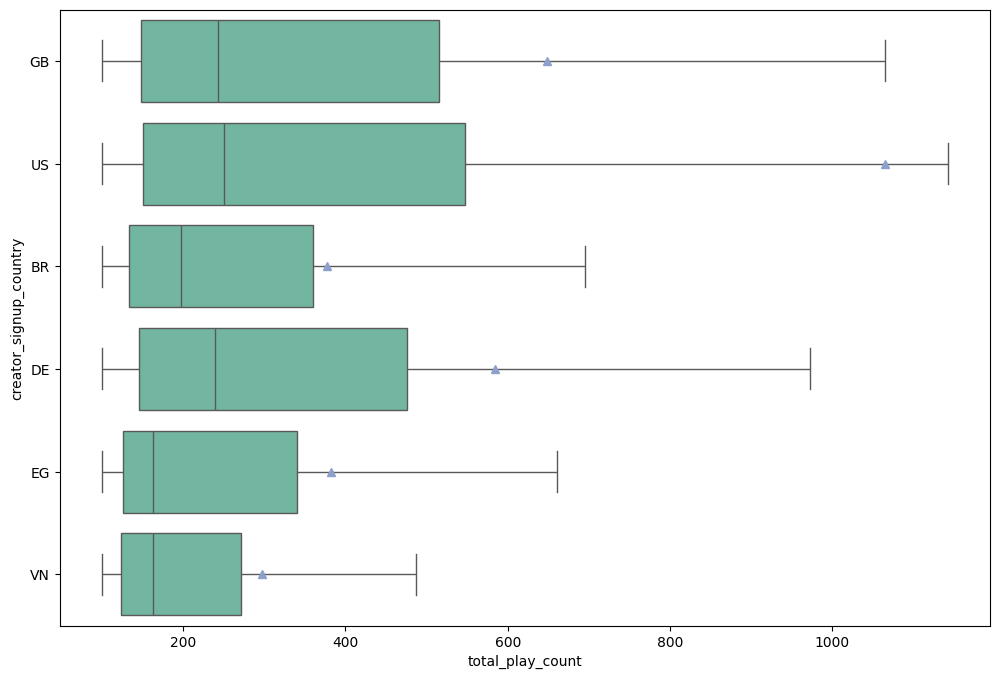

In [ ]:
# First check out overall difference in total plays per country across all genres
sns.boxplot(data=listeners_data, x="total_play_count", y="creator_signup_country", showfliers=False, showmeans=True)

<Figure size 1200x600 with 0 Axes>

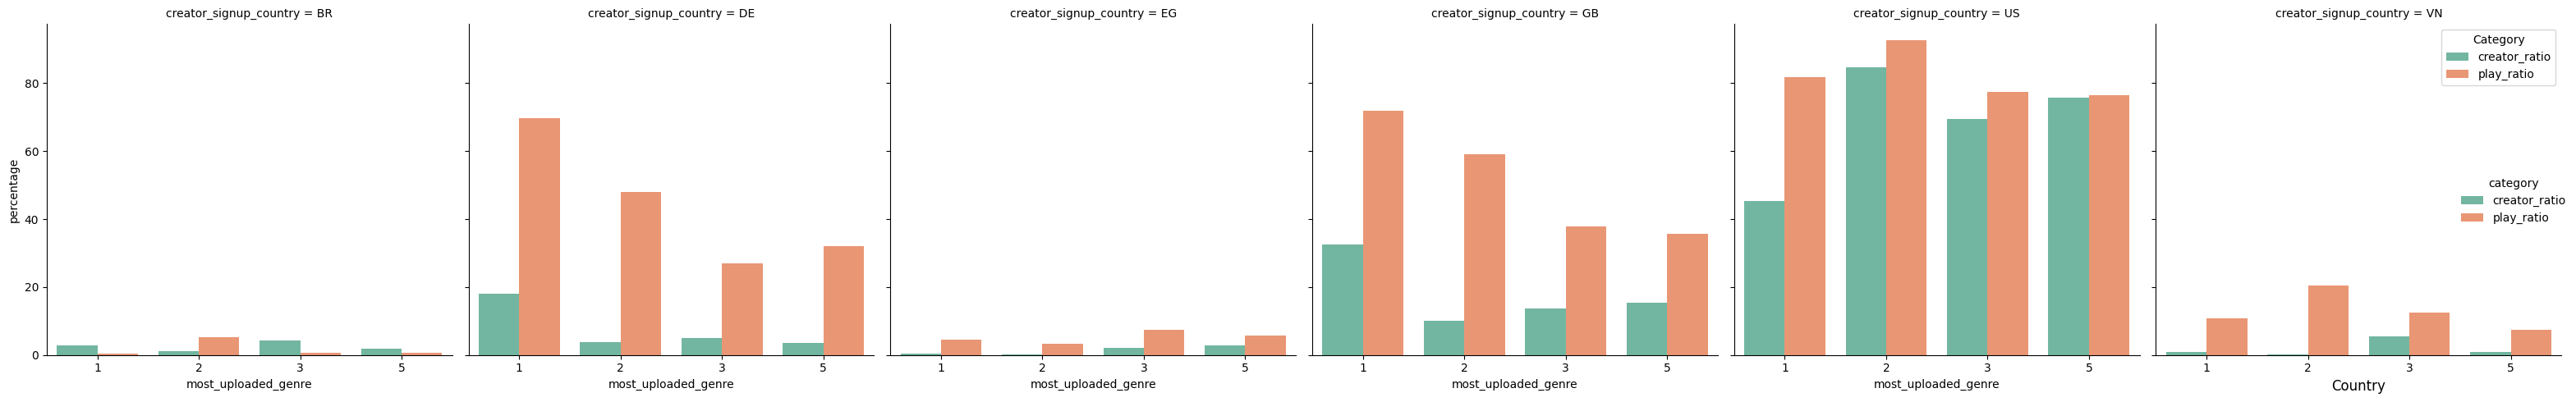

In [94]:
# Visualization time!

# Reshape the data for visualization
data = []
for country in COUNTRY_VALUES:
    df_melted = representation_ratios[representation_ratios["creator_signup_country"] == country].rename(columns={f"play_ratio_{country}": "play_ratio"}).melt(
        id_vars=["most_uploaded_genre", "creator_signup_country"],
        value_vars=["creator_ratio", "play_ratio"],
        var_name="category",
        value_name="percentage"
    )
    data.append(df_melted)
df_melted = pd.concat(data)

# Plot the comparison as grouped barplots
plt.figure(figsize=(12, 6))
sns.catplot(data=df_melted, x="most_uploaded_genre", y="percentage", hue="category", col="creator_signup_country", kind="bar")
#plt.title("Representatio Ratios per Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

## 💬 Step 2 (Optional): Creator Engagement Equity Analysis
*Let's analyze gender representation and inclusive participation patterns in creator-driven community engagement, identifying barriers to equitable voice and participation opportunities across gender identities and musical genres.*

### a) 👥 Gender Equity in Creators' Engagement
Let's analyze whether there are equitable participation opportunities across creator genders and identify any barriers to engagement that may disproportionately affect certain gender groups.
- Do all creator genders have equal representation in platform engagement?
- How do you think gender identity impacts creator engagement opportunities?

💡 If you need a refresher of the comments dataset, have an additional look at your dataset and start with simple visualizations of the distributions represented in the dataset.

💡 For the genres 1,2,3,5 you have additional listening statistics in the listeners dataset. These genres are also in the top 5 of the genres with most listener comments. 

In [31]:
# Find out which creators' genders are more active commenters (as new commenters) across all genres
relevant_columns = {
    "new_comments_by_female_creator": "female",
    "new_comments_by_male_creator": "male",
    "new_comments_by_custom_gender_creator": "custom",
    "new_comments_by_null_gender_creator": "unknown"
}

creators_engagement = comments_data.melt(id_vars=["assigned_number_for_genre_type"], value_vars=relevant_columns.keys(), var_name="gender", value_name="comments_count").replace(relevant_columns)
creators_engagement

,assigned_number_for_genre_type,gender,comments_count
0,1,female,172
1,2,female,91
2,3,female,56
3,5,female,17
4,7,female,3
...,...,...,...
227,42,unknown,0
228,55,unknown,0
229,56,unknown,0
230,57,unknown,0


<Axes: xlabel='comments_count'>

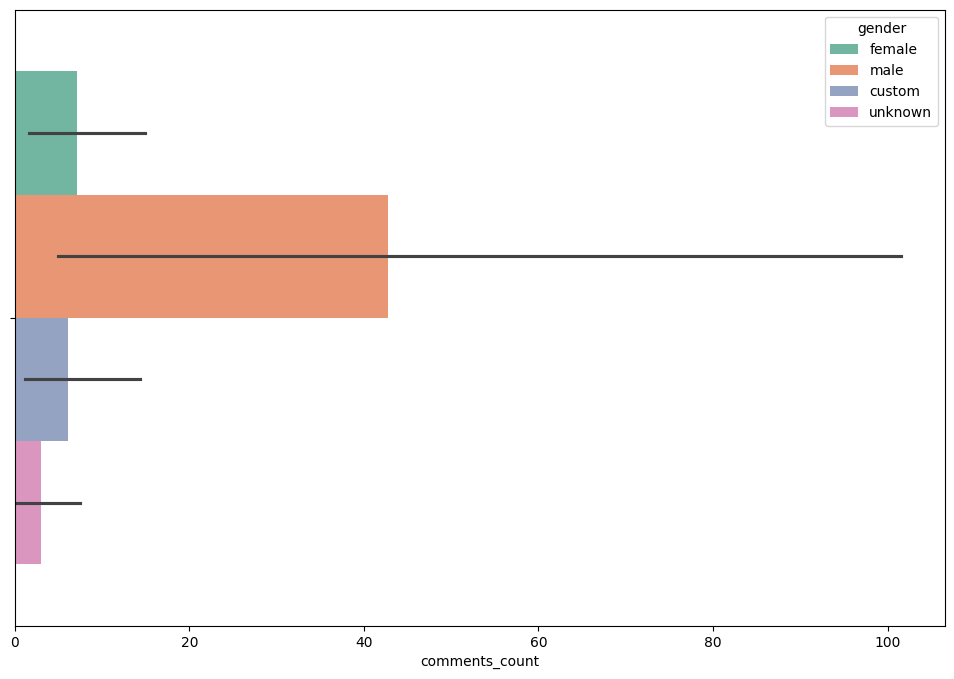

In [32]:
sns.barplot(creators_engagement, x="comments_count", hue="gender")

In [34]:
# Find out which creators' genders are more active responders across genres
relevant_columns = {
    "responses_by_female_creator": "female",
    "responses_by_male_creator": "male",
    "responses_by_custom_gender_creator": "custom",
    "responses_by_null_gender_creator": "unknown"
}

creators_engagement_responses = comments_data.melt(id_vars=["assigned_number_for_genre_type"], value_vars=relevant_columns.keys(), var_name="gender", value_name="responses_count").replace(relevant_columns)
creators_engagement_responses

,assigned_number_for_genre_type,gender,responses_count
0,1,female,763
1,2,female,73
2,3,female,162
3,5,female,33
4,7,female,19
...,...,...,...
227,42,unknown,0
228,55,unknown,0
229,56,unknown,0
230,57,unknown,0


<Axes: xlabel='responses_count'>

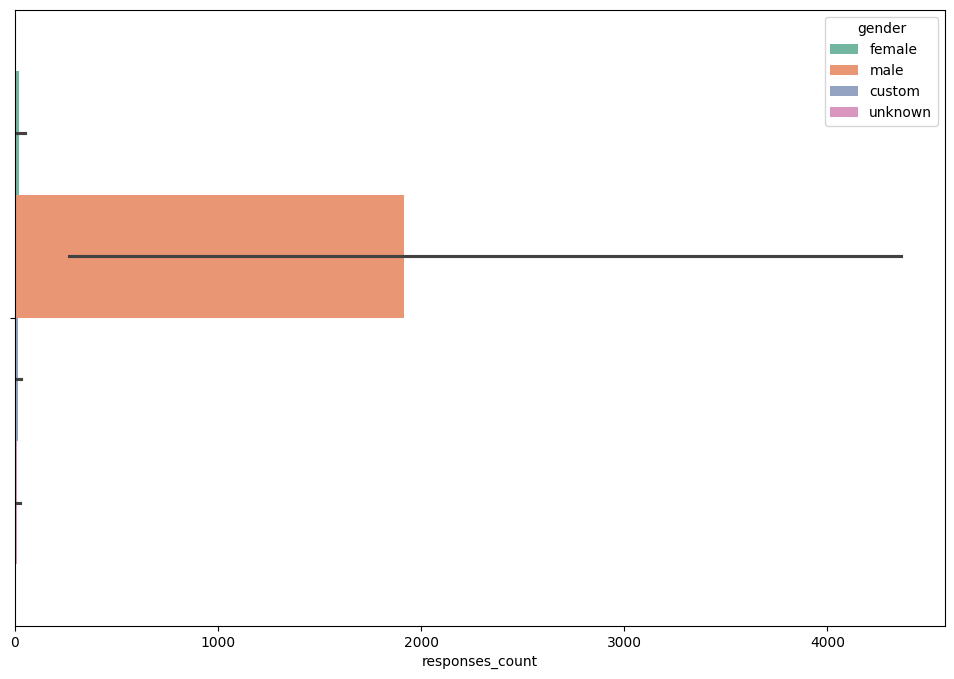

In [36]:
sns.barplot(creators_engagement_responses, x="responses_count", hue="gender")

### b) 🎧 Engagements vs Creator Equity Gap Analysis
Let's have a detailed look at the 4 genres for which we also have listeners data and examine which genders are represented in which gender and how this ratio compares to the engagement ratio per gender.

For this section, we combine both datasets: listeners data and comments data. For this, we first reduce the comments data to the 4 genres for which we also have listeners data.

In [51]:
# Select subset of comments dataset for genres 1,2,3,5
subset_comments_data = comments_data[comments_data["assigned_number_for_genre_type"].isin([1,2,3,5])]
subset_comments_data.shape

(4, 26)

In [52]:
# To put the engagement data into perspective, we first calculate the statistics per genre (or reuse them from an earlier section)
listeners_data_grouped_by_gender = listeners_data.groupby(["most_uploaded_genre", "creator_gender"]).agg(
    total_play_count=('total_play_count', 'sum'),
    total_play_count_female=('total_play_count_female', 'sum'),
    total_play_count_male=('total_play_count_male', 'sum'),
    total_play_count_custom_gender=('total_play_count_custom_gender', 'sum'),
    total_play_count_unknown_gender=('total_play_count_null_gender', 'sum'),
    num_creators_in_group=('most_uploaded_genre', 'size')  # Get column count
).reset_index()

listeners_data_grouped = listeners_data.groupby(["most_uploaded_genre"]).agg(
    total_play_count=('total_play_count', 'sum'),
    total_play_count_female=('total_play_count_female', 'sum'),
    total_play_count_male=('total_play_count_male', 'sum'),
    total_play_count_custom_gender=('total_play_count_custom_gender', 'sum'),
    total_play_count_unknown_gender=('total_play_count_null_gender', 'sum'),
    num_creators_in_group=('most_uploaded_genre', 'size')  # Get column count
).reset_index()

listeners_data_grouped

,most_uploaded_genre,total_play_count,total_play_count_female,total_play_count_male,total_play_count_custom_gender,total_play_count_unknown_gender,num_creators_in_group
0,1,13008485,2758141,8519515,522294,1208535,21806
1,2,43277208,6070773,32395454,1018196,3792785,37145
2,3,2933116,1165511,1357769,157333,252503,4661
3,5,1199646,356935,690106,57825,94780,1655


In [53]:
# let's merge both datasets
# Docs: https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare 

subset_comments_data = subset_comments_data.rename(columns={"assigned_number_for_genre_type": "genre"})
listeners_data_grouped = listeners_data_grouped.rename(columns={"assigned_number_for_genre_type": "genre"})

engagement_listening_stats = subset_comments_data.join(listeners_data_grouped, on="genre")

In [59]:
engagement_listening_stats

,genre,new_comments_by_male_creator,pct_new_comments_by_male_creator,new_comments_by_female_creator,pct_new_comments_by_female_creator,new_comments_by_custom_gender_creator,pct_new_comments_by_custom_gender_creator,new_comments_by_null_gender_creator,pct_new_comments_by_null_gender_creator,total_new_creator_comment_count,...,total_play_count,total_play_count_female,total_play_count_male,total_play_count_custom_gender,total_play_count_unknown_gender,num_creators_in_group,pct_plays_by_male,pct_plays_by_female,pct_plays_by_custom_gender,pct_plays_by_unknown_gender
0,1,1307,72.61,172,9.56,215,11.94,106,5.89,1800,...,43277208.0,6070773.0,32395454.0,1018196.0,3792785.0,37145.0,0.748557,0.140276,0.023527,0.087639
1,2,800,82.22,91,9.35,33,3.39,49,5.04,973,...,2933116.0,1165511.0,1357769.0,157333.0,252503.0,4661.0,0.462910,0.397363,0.053640,0.086087
2,3,88,45.36,56,28.87,46,23.71,4,2.06,194,...,1199646.0,356935.0,690106.0,57825.0,94780.0,1655.0,0.575258,0.297534,0.048202,0.079007
3,5,52,62.65,17,20.48,12,14.46,2,2.41,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
engagement_listening_stats[["genre", "total_new_creator_comment_count", "listener_new_comment_count", "total_responses_by_listener", "total_responses_by_creator", "total_reponse_count", "total_play_count"]]

In [55]:
engagement_listening_stats[["genre", "total_new_creator_comment_count", "listener_new_comment_count", "total_responses_by_listener", "total_responses_by_creator", "total_reponse_count", "total_play_count"]]

,genre,total_new_creator_comment_count,listener_new_comment_count,total_responses_by_listener,total_responses_by_creator,total_reponse_count,total_play_count
0,1,1800,48432,4795,7320,12295,43277208.0
1,2,973,36813,3361,2119,5492,2933116.0
2,3,194,6797,827,534,1395,1199646.0
3,5,83,2127,235,336,589,NaN


In [70]:
# Calculate percentages of plays
GENDERS = ['male', 'female', 'custom_gender']
for gender in GENDERS:
    engagement_listening_stats[f"pct_plays_by_{gender}"] = engagement_listening_stats[f"total_play_count_{gender}"] / engagement_listening_stats["total_play_count"]

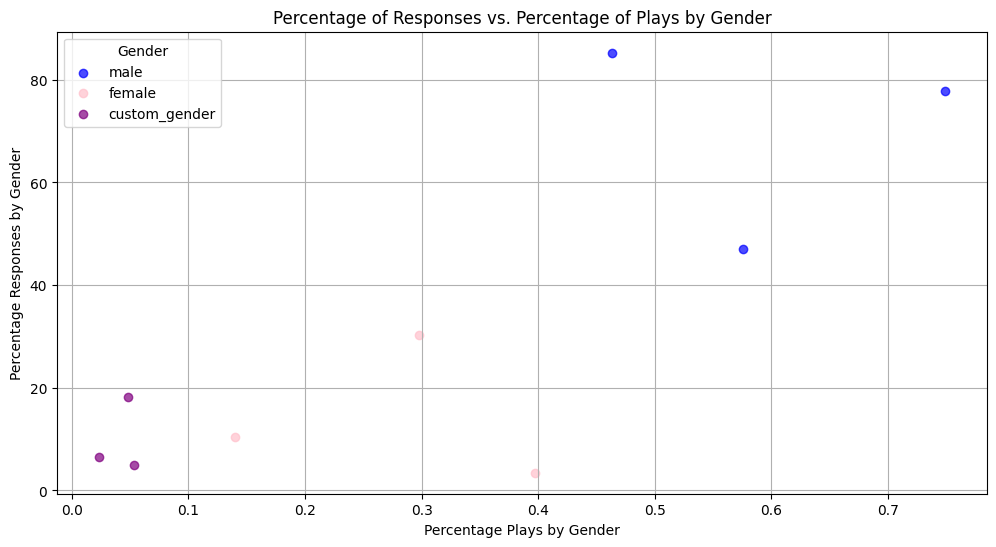

In [71]:
# Visualize gaps between percentages of plays vs. percentages of new comments and percentage of responses
plt.figure(figsize=(12, 6))

# Use a consistent color coding for genders to differentiate them well
gender_palette = {
    'male': 'blue',
    'female': 'pink',
    'custom_gender': 'purple',
}

for gender in GENDERS:
    plt.scatter(
        engagement_listening_stats[f"pct_plays_by_{gender}"],
        engagement_listening_stats[f"pct_responses_by_{gender}_creator"],
        label=gender,
        color=gender_palette[gender],
        alpha=0.7  # Add transparency for better visualization overlapping points
    )

plt.title(f"Percentage of Responses vs. Percentage of Plays by Gender")
plt.xlabel("Percentage Plays by Gender")
plt.ylabel("Percentage Responses by Gender")
plt.legend(title='Gender')
plt.grid(visible= True)

## 💡 Key Insights

Based on your analysis above, write down 3-5 key insights you've discovered about DEI in the music industry:

### Your Insights:

1. **Gender Representation**: [Write your observation about gender distribution among creators and listeners]

2. **Listener Diversity by Country**: [Write your observation about how listener demographics differ across countries]

3. **Genre-Specific Trends**: [Write your observation about differences across genres]

4. **Data Limitations & Biases**: [Write your observation about missing or anonymized data and its implications]

5. **Additional Insight**: [Any other pattern you noticed]

## Next Steps

Excellent work! You've completed advanced-level statistical analysis including:

- Extracting insights from data related to creators and listeners in the music industry.
- Visualizing relationships and patterns within the data to uncover the underlying patterns.